In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\DA\GlobalEV2023.csv',encoding='unicode_escape')

In [3]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
...,...,...,...,...,...,...,...,...
9537,World,Projection-APS,EV stock,Trucks,PHEV,2030,Vehicles,9.100000e+05
9538,World,Projection-APS,EV stock,Vans,BEV,2030,Vehicles,1.200000e+07
9539,World,Projection-APS,EV stock,Vans,PHEV,2030,Vehicles,1.300000e+06
9540,World,Projection-APS,EV stock,Cars,BEV,2030,Vehicles,1.800000e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   object 
 1   category    9542 non-null   object 
 2   parameter   9542 non-null   object 
 3   mode        9542 non-null   object 
 4   powertrain  9542 non-null   object 
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   object 
 7   value       9542 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 596.5+ KB


In [5]:
df.describe()

,year,value
count,9542.000000,9.542000e+03
mean,2018.359883,2.331378e+05
std,4.590404,3.349828e+06
min,2010.000000,1.100000e-06
25%,2015.000000,7.600000e-01
50%,2019.000000,6.600000e+01
75%,2021.000000,3.800000e+03
max,2030.000000,1.800000e+08


In [6]:
df.shape

(9542, 8)

In [7]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


## Checking for missing values

In [8]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Checking the distribution of Categorical data

In [10]:
df.parameter.value_counts()

EV stock                         2388
EV sales                         2236
EV stock share                   1478
EV sales share                   1409
EV charging points                664
Oil displacement Mbd              466
Oil displacement, million lge     466
Electricity demand                435
Name: parameter, dtype: int64

In [11]:
df.category.value_counts()

Historical          7579
Projection-STEPS    1013
Projection-APS       950
Name: category, dtype: int64

In [12]:
df.unit.value_counts()

Vehicles                         4624
percent                          2887
charging points                   664
Milion barrels per day            466
Oil displacement, million lge     466
GWh                               435
Name: unit, dtype: int64

In [13]:
df.powertrain.value_counts()

EV                         4254
BEV                        2891
PHEV                       1733
Publicly available slow     334
Publicly available fast     330
Name: powertrain, dtype: int64

In [14]:
df['mode'].value_counts()


Cars      3316
Vans      2149
Buses     1964
Trucks    1449
EV         664
Name: mode, dtype: int64

In [15]:
df['mode'].dtype

dtype('O')

In [16]:
df.describe(include='object')

,region,category,parameter,mode,powertrain,unit
count,9542,9542,9542,9542,9542,9542
unique,38,3,8,5,5,6
top,China,Historical,EV stock,Cars,EV,Vehicles
freq,828,7579,2388,3316,4254,4624


## Exploratory Data Analysis

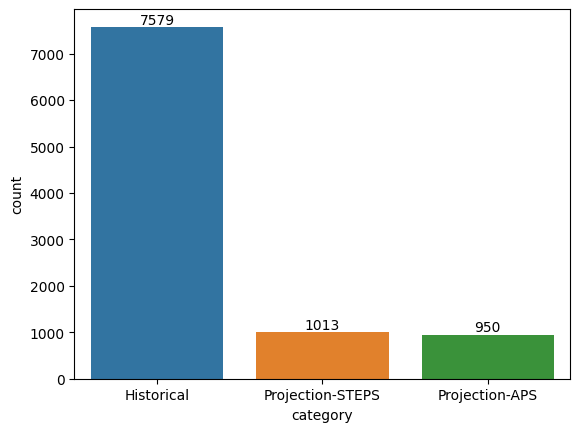

In [17]:
import seaborn as sns
ax=sns.countplot(x='category',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

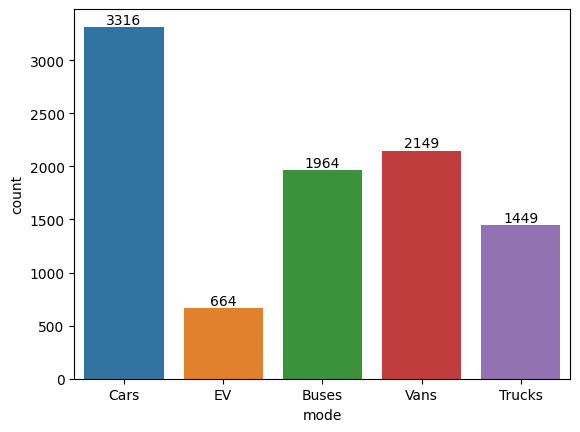

In [18]:
import seaborn as sns
ax=sns.countplot(x='mode',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

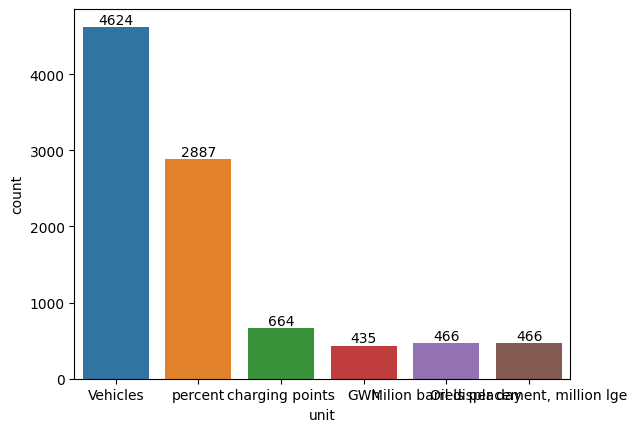

In [19]:
ax=sns.countplot(x='unit',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

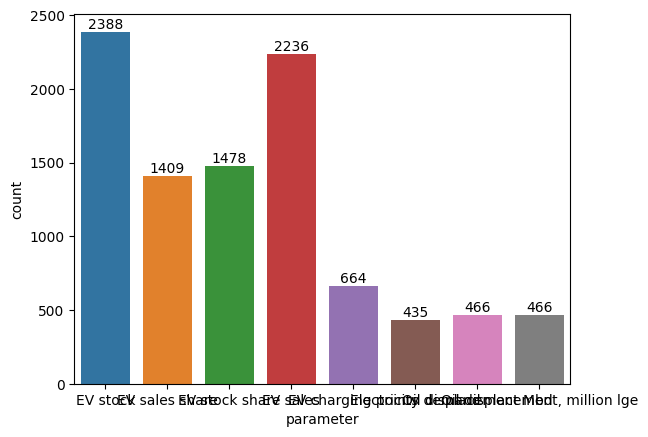

In [20]:
ax=sns.countplot(x='parameter',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='parameter', ylabel='value'>

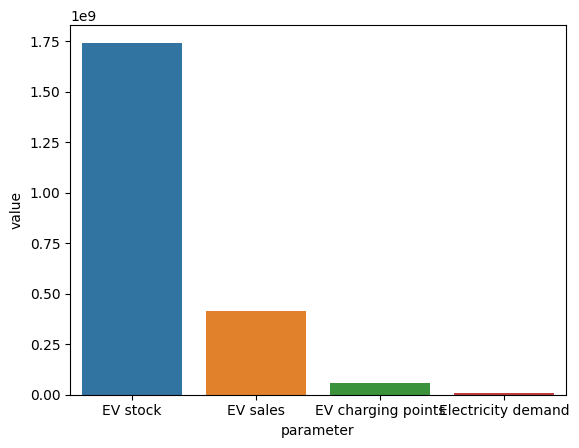

In [21]:
value_para=df.groupby(['parameter'],as_index=False)['value'].sum().sort_values(by='value',ascending=False).head(4)

sns.barplot(x='parameter',y='value',data=value_para)

<Axes: xlabel='region', ylabel='value'>

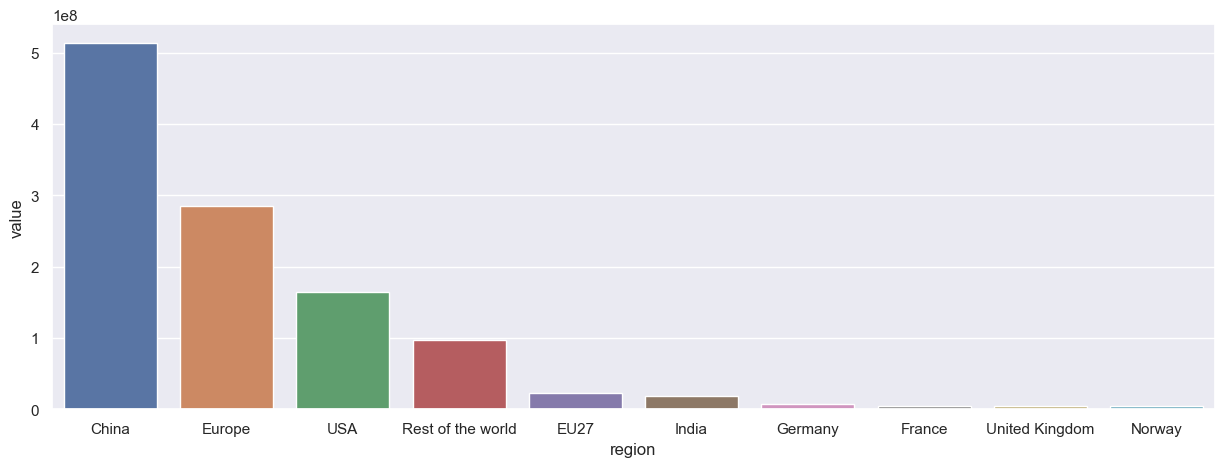

In [22]:

sales_con_excluding_world = df[df['region'] != 'World'].groupby('region', as_index=False)['value'].sum().sort_values(by='value', ascending=False).head(10)

# Now, plot the data excluding the 'World'
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='region', y='value', data=sales_con_excluding_world)


## What are the current EV adoption rates in different countries, and how have these rates changed over time?


In [23]:
df_year=df[df['year']==2022]

In [24]:
df_year

,region,category,parameter,mode,powertrain,year,unit,value
74,Australia,Historical,EV charging points,EV,Publicly available fast,2022,charging points,470.00
75,Australia,Historical,EV charging points,EV,Publicly available slow,2022,charging points,2100.00
76,Australia,Historical,EV stock share,Cars,EV,2022,percent,0.59
77,Australia,Historical,EV sales share,Cars,EV,2022,percent,5.10
78,Australia,Historical,EV stock,Cars,BEV,2022,Vehicles,67000.00
...,...,...,...,...,...,...,...,...
9389,World,Historical,EV stock,Buses,PHEV,2022,Vehicles,100000.00
9390,World,Historical,EV sales,Vans,BEV,2022,Vehicles,300000.00
9391,World,Historical,EV stock,Vans,BEV,2022,Vehicles,930000.00
9392,World,Historical,EV sales,Vans,PHEV,2022,Vehicles,7900.00


In [25]:
df_filtered = df_year[~df_year['region'].isin(['World', 'Rest of the world'])]

In [26]:
filtered_df = df_filtered[df_filtered['parameter'] == 'EV sales']


In [27]:
evsales=filtered_df.groupby('region', as_index=False)['value'].sum().reset_index().sort_values(by='value', ascending=False).head(10)


In [28]:
evsales

,index,region,value
6,6,China,18411900.0
9,9,Europe,8099355.0
32,32,USA,2970000.0
8,8,EU27,2049984.0
12,12,Germany,850245.0
33,33,United Kingdom,388360.0
11,11,France,357822.0
23,23,Norway,173890.0
29,29,Sweden,168397.0
19,19,Korea,167640.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'USA'),
  Text(3, 0, 'EU27'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Korea')])

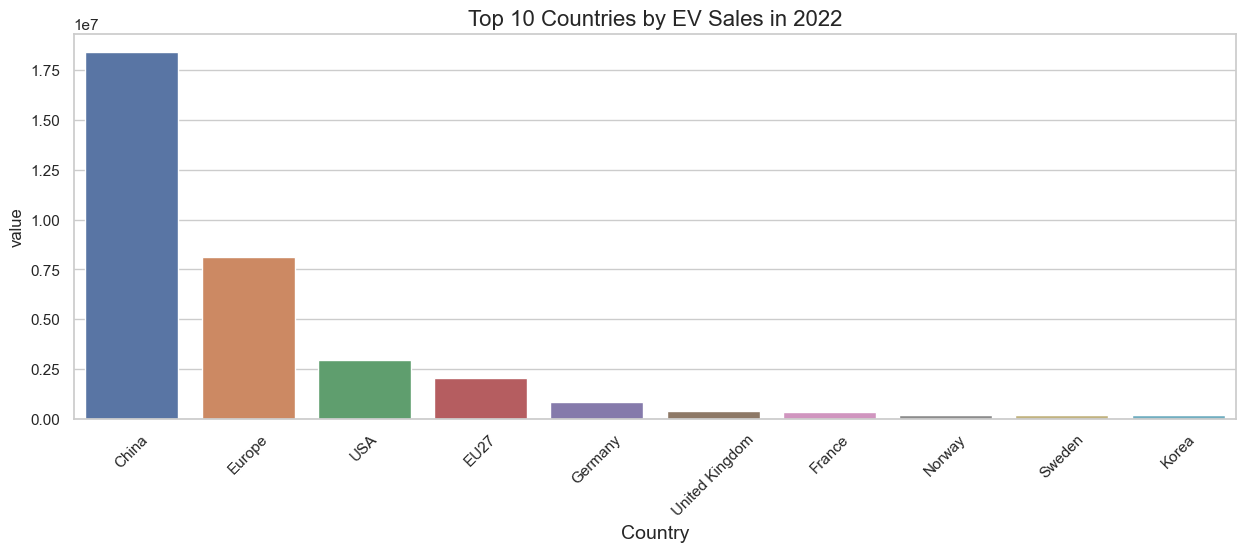

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style and context
sns.set(style="whitegrid", rc={'figure.figsize':(15,5)})

# Creating the bar plot
ax = sns.barplot(x='region', y='value', data=evsales)

# Adding the title and labels
ax.set_title('Top 10 Countries by EV Sales in 2022', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
plt.xticks(rotation=45) 

In [30]:
Adoption_df=df[~df['region'].isin(['World', 'Rest of the world'])]
top_countries = Adoption_df.groupby('region')['value'].sum().sort_values(ascending=False).head(20)
df_top20 = Adoption_df[Adoption_df['region'].isin(top_countries.index)]

In [31]:
Adoption_rates_over_time=df_top20[(df_top20['parameter'].isin(['EV sales','EV stock'])) & (df_top20['category'] == 'Historical')]
Adoption_rates_over_time.groupby(['region', 'year'],as_index=False)['value'].sum().reset_index().sort_values(by='value', ascending=False)

,index,region,year,value
38,38,China,2022,21780000.0
37,37,China,2021,12395090.0
77,77,Europe,2022,10807456.0
76,76,Europe,2021,8098095.0
64,64,EU27,2022,7979360.0
...,...,...,...,...
195,195,Spain,2010,152.0
143,143,Korea,2010,132.0
39,39,Denmark,2010,104.0
208,208,Sweden,2010,8.0


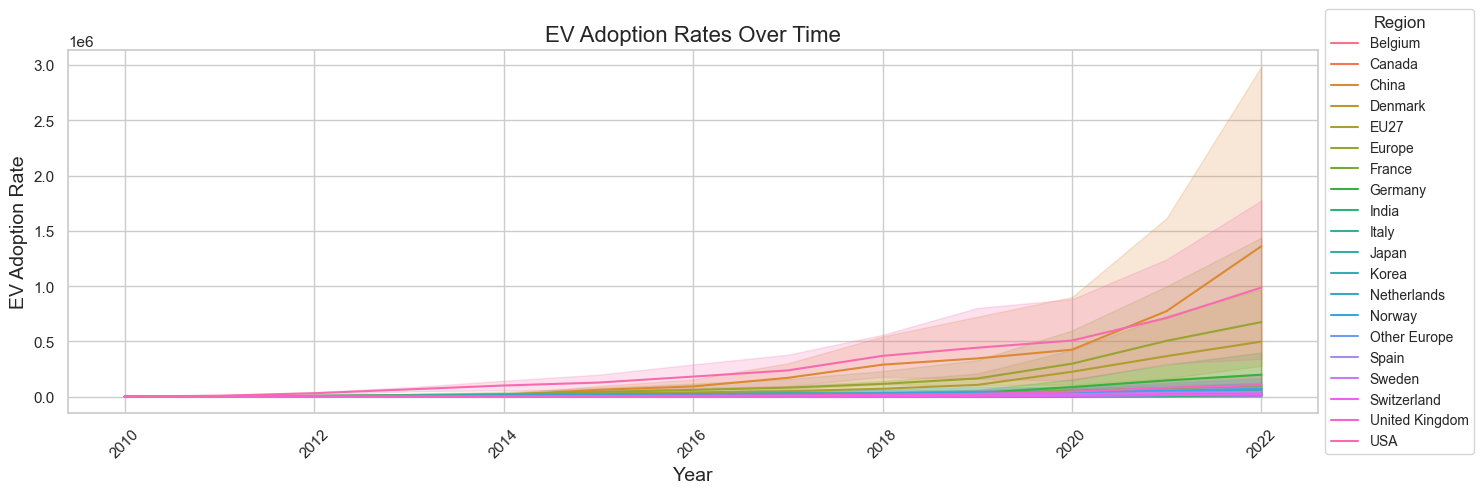

In [32]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,5)})
ax = sns.lineplot(x="year", y="value", hue="region", data=Adoption_rates_over_time)
ax.set_title('EV Adoption Rates Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('EV Adoption Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.tight_layout()  
plt.show()

## Which countries have seen the most significant growth in EV adoption in the past decade, and what predictions can be made for future trends?


In [33]:
Adoption_rates_over_decade=df_top20[(df_top20['parameter'].isin(['EV sales','EV stock'])) & (df_top20['category'] == 'Historical') & (df_top20['year']>2012)]

In [34]:
Adoption_rates_over_decade.groupby(['region', 'year'],as_index=False)['value'].sum().reset_index().sort_values(by='value', ascending=False)

,index,region,year,value
29,29,China,2022,21780000.0
28,28,China,2021,12395090.0
59,59,Europe,2022,10807456.0
58,58,Europe,2021,8098095.0
49,49,EU27,2022,7979360.0
...,...,...,...,...
0,0,Belgium,2013,2900.0
150,150,Spain,2013,2844.0
140,140,Other Europe,2013,2498.0
30,30,Denmark,2013,2466.0


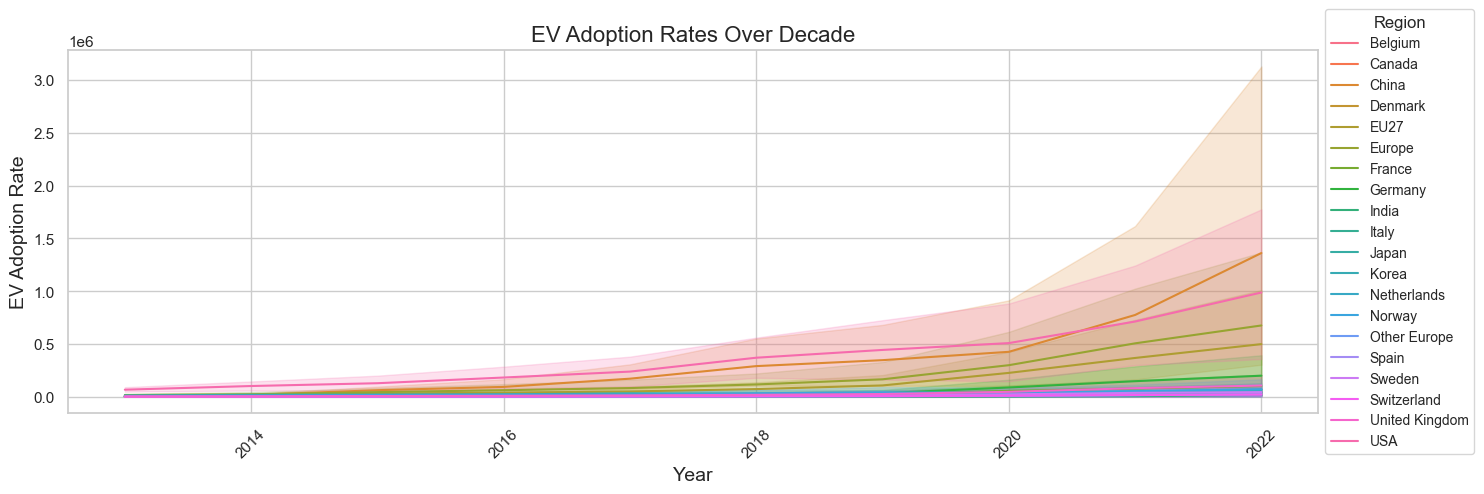

In [35]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,5)})
ax = sns.lineplot(x="year", y="value", hue="region", data=Adoption_rates_over_decade)
ax.set_title('EV Adoption Rates Over Decade', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('EV Adoption Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.tight_layout()  
plt.show()

some countries which have seen the most significant growth in EV adoption in the past decade are Belgium,Canada,China,Denmark etc

In [36]:

Adoption_rates_over_decade_ = df_top20[(df_top20['parameter'].isin(['EV sales', 'EV stock'])) & (df_top20['category'] == 'Historical') & (df_top20['year'] > 2012)].copy()

#Calculating the Previous Year's Value
Adoption_rates_over_decade_['previous_value'] = Adoption_rates_over_decade_.groupby('region')['value'].shift(1)
#Calculating the Growth Rate
Adoption_rates_over_decade_['growth_rate'] = ((Adoption_rates_over_decade_['value'] - Adoption_rates_over_decade_['previous_value']) / Adoption_rates_over_decade_['previous_value']) * 100


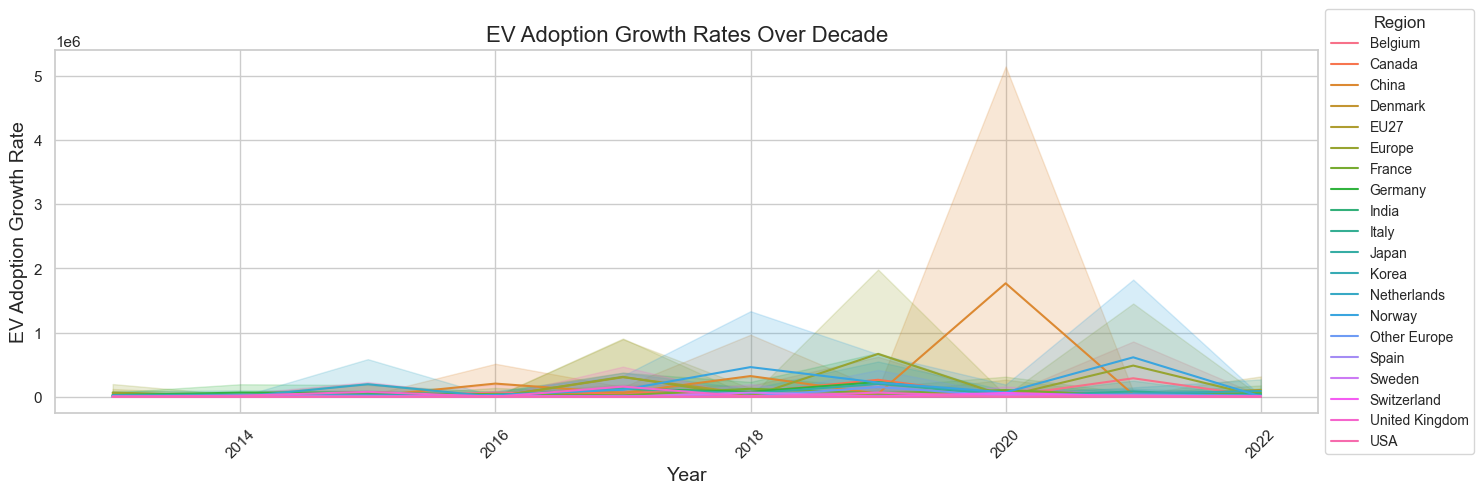

In [37]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,5)})
ax = sns.lineplot(x="year", y="growth_rate", hue="region", data=Adoption_rates_over_decade_)
ax.set_title('EV Adoption Growth Rates Over Decade', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('EV Adoption Growth Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.tight_layout()  
plt.show()

In [50]:
# Assuming df is your DataFrame
steps_projection = Adoption_df[Adoption_df['category'] == 'Projection-STEPS']
aps_projection = Adoption_df[Adoption_df['category'] == 'Projection-APS']


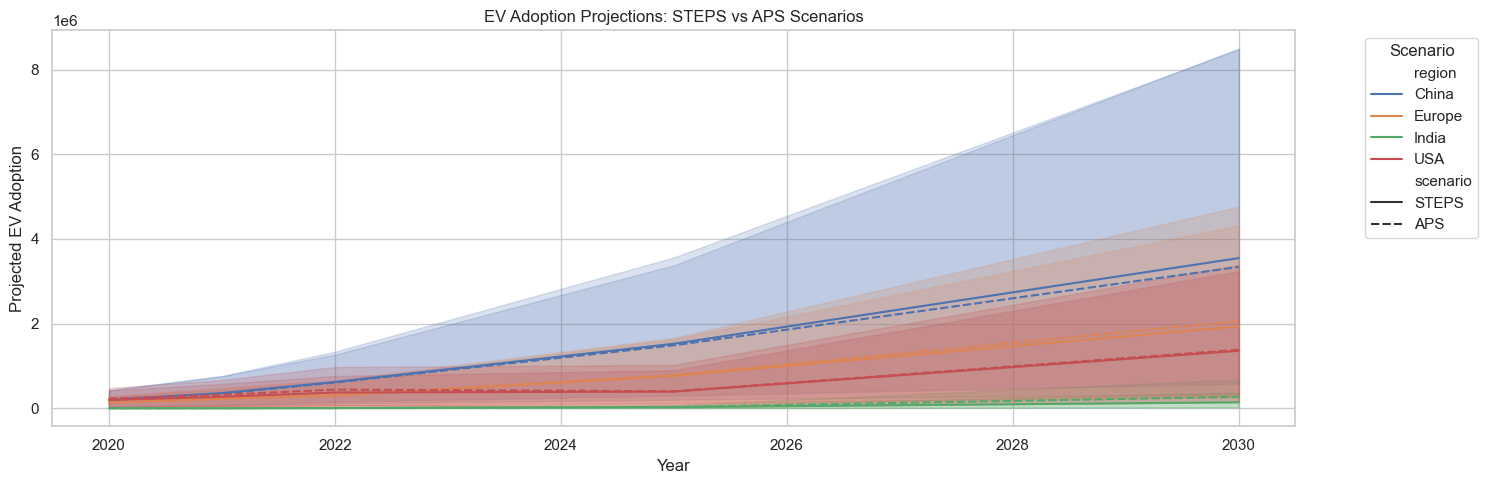

In [43]:

combined_projections = pd.concat([steps_projection.assign(scenario='STEPS'),
                                  aps_projection.assign(scenario='APS')])


sns.lineplot(data=combined_projections, x='year', y='value', hue='region', style='scenario')
plt.title('EV Adoption Projections: STEPS vs APS Scenarios')
plt.xlabel('Year')
plt.ylabel('Projected EV Adoption')
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## How does the availability and density of EV charging infrastructure correlate with EV adoption rates in different countries?


In [44]:
Charginginfrastructure=df_top20[(df_top20['parameter'].isin(['EV sales','EV stock','EV charging points'])) & (df_top20['category'] == 'Historical')]


In [46]:
Charginginfrastructure.groupby(['region'])['value'].sum().reset_index().sort_values(by='value', ascending=False)

,region,value
2,China,60973488.1
5,Europe,31351083.0
4,EU27,22154111.0
18,USA,15774380.0
7,Germany,7267215.0
6,France,4682625.0
19,United Kingdom,4365424.0
13,Norway,3875884.0
10,Japan,3132028.0
12,Netherlands,2994826.0


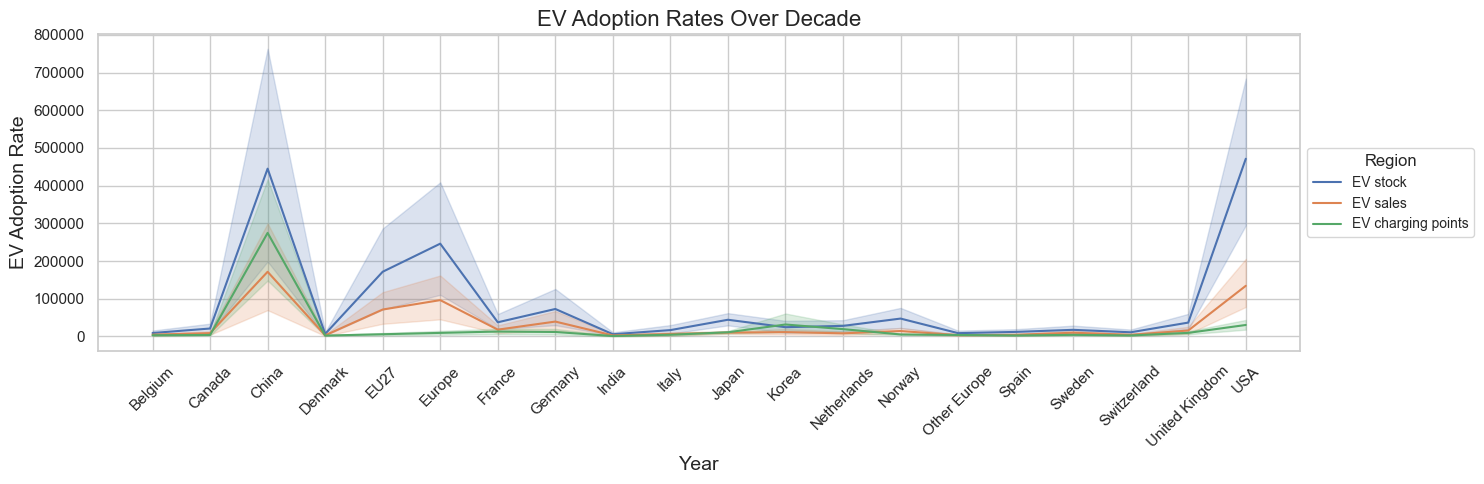

In [49]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,5)})
ax = sns.lineplot(x="region", y="value", hue="parameter", data=Charginginfrastructure)
ax.set_title('Effect of Charging points in sales', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('EV Adoption Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='parameter', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.tight_layout()  
plt.show()

In [52]:
charging_points = df_top20[(df_top20['parameter'] == 'EV charging points') & (df_top20['category'] == 'Historical')].groupby('region')['value'].sum().reset_index()


In [53]:
merged_data = pd.merge(Adoption_rates_over_time, charging_points, on='region', suffixes=('_ev', '_charging'))


In [54]:
merged_data

,region,category,parameter,mode,powertrain,year,unit,value_ev,value_charging
0,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3.0,60469.0
1,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7.0,60469.0
2,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62.0,60469.0
3,Belgium,Historical,EV sales,Cars,BEV,2010,Vehicles,48.0,60469.0
4,Belgium,Historical,EV stock,Cars,BEV,2010,Vehicles,61.0,60469.0
...,...,...,...,...,...,...,...,...,...
2006,USA,Historical,EV stock,Cars,PHEV,2021,Vehicles,720000.0,636580.0
2007,USA,Historical,EV stock,Cars,PHEV,2022,Vehicles,860000.0,636580.0
2008,USA,Historical,EV sales,Cars,PHEV,2022,Vehicles,190000.0,636580.0
2009,USA,Historical,EV stock,Cars,BEV,2022,Vehicles,2100000.0,636580.0


In [55]:
correlation = merged_data[['value_ev', 'value_charging']].corr()


In [56]:
correlation

,value_ev,value_charging
value_ev,1.000000,0.238678
value_charging,0.238678,1.000000


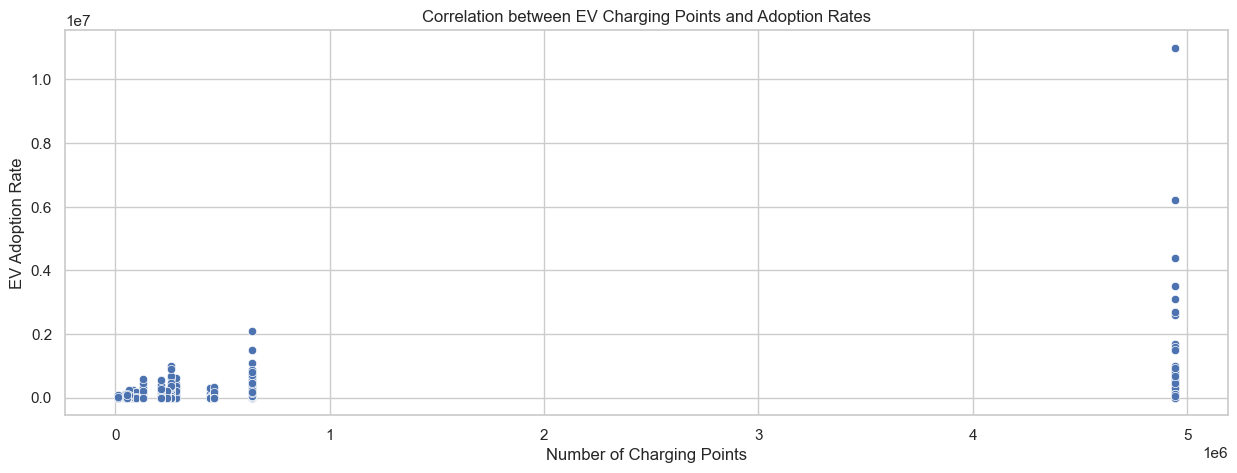

In [57]:
sns.scatterplot(data=merged_data, x='value_charging', y='value_ev')
plt.xlabel('Number of Charging Points')
plt.ylabel('EV Adoption Rate')
plt.title('Correlation between EV Charging Points and Adoption Rates')
plt.show()

The correlation coefficient value of 0.239 suggests a weak to moderate positive relationship. While there is some association, it's not particularly strong. This might imply that while charging infrastructure availability is a factor in EV adoption, it's not the sole or most significant driver.

## How have advancements in EV technology, such as battery life and charging speed, influenced adoption rates in different regions?


In [60]:
p_train= df_top20[(df_top20['parameter'] == 'EV sales','EV stock') & (df_top20['category'] == 'Historical') & (df_top20['powertrain'] == ['Publicly available fast','Publicly available slow'])

SyntaxError: incomplete input (4273897986.py, line 1)